### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from scipy.stats import linregress
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

df=pd.read_csv('data/2019_Yellow_Taxi_Trip_Data.csv')
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [7]:
df.shape

(10000, 18)

#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [8]:
summary_stats = df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()
print(summary_stats)

        fare_amount    tip_amount  tolls_amount  total_amount
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      15.106313      2.634494      0.623447     22.564659
std       13.954762      3.409800      6.437507     19.209255
min      -52.000000      0.000000     -6.120000    -65.920000
25%        7.000000      0.000000      0.000000     12.375000
50%       10.000000      2.000000      0.000000     16.300000
75%       16.000000      3.250000      0.000000     22.880000
max      176.000000     43.000000    612.000000    671.800000


#### Exercise 4

Count the number of NAs in each column.

In [9]:
na_counts = df.isna().sum()
print(na_counts)
df

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2019-10-23T17:39:59.000,2019-10-23T17:49:26.000,2,1.30,1,N,238,239,1,8.0,3.5,0.5,2.46,0.00,0.3,14.76,2.5
9996,1,2019-10-23T17:53:02.000,2019-10-23T18:00:45.000,1,1.40,1,N,239,166,2,8.0,3.5,0.5,0.00,0.00,0.3,12.30,2.5
9997,1,2019-10-23T17:07:16.000,2019-10-23T17:11:35.000,1,0.70,1,N,166,152,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80,0.0
9998,1,2019-10-23T17:38:26.000,2019-10-23T17:49:28.000,2,2.50,1,N,151,42,1,10.0,1.0,0.5,0.00,0.00,0.3,11.80,0.0


#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

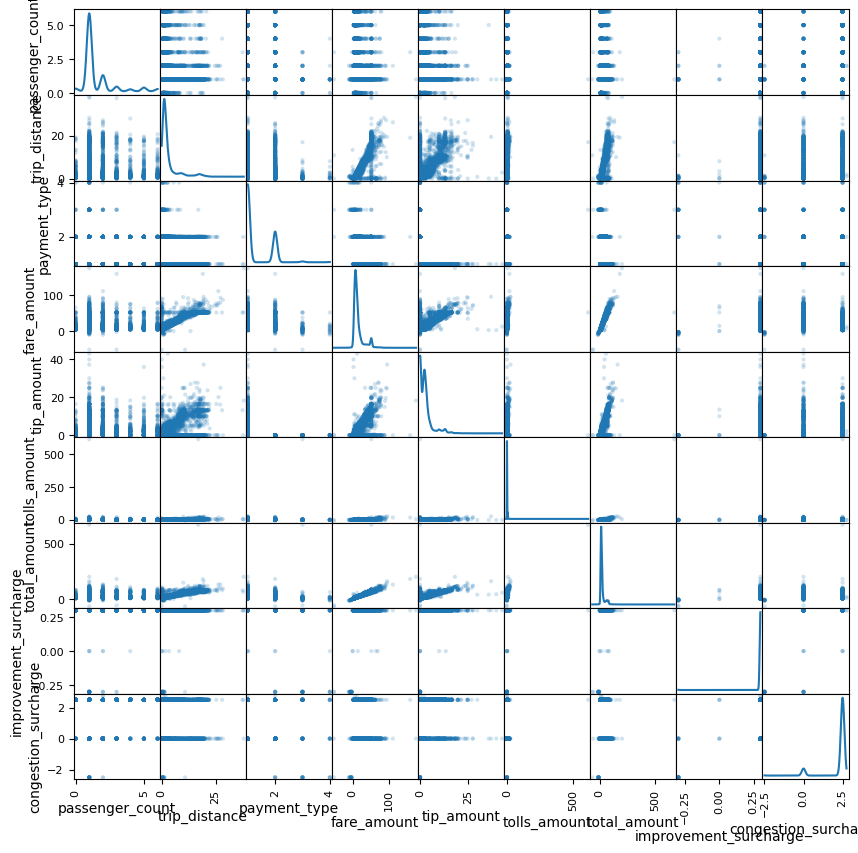

In [10]:
dropped_columns=df.drop(['vendorid','ratecodeid','pulocationid','dolocationid'],axis=1)
dropped_columns
pd.plotting.scatter_matrix(df[['passenger_count','trip_distance','payment_type','fare_amount','tip_amount','tolls_amount','total_amount','improvement_surcharge','congestion_surcharge']],alpha=0.2,figsize=(10,10),diagonal='kde')
plt.show()

#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

array([[<Axes: title={'center': 'total_amount'}>]], dtype=object)

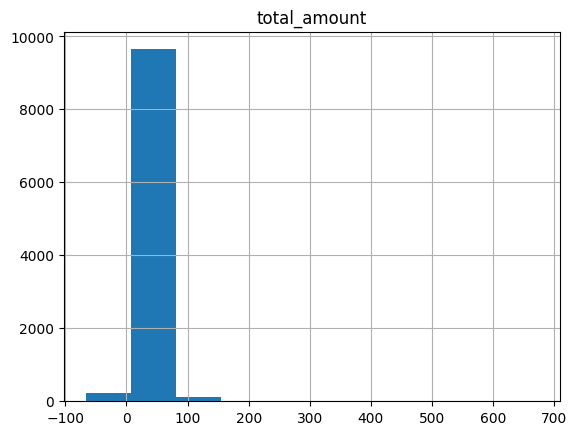

In [11]:
df['total_amount'].std()
df.hist(column='total_amount')
#As per the visualization of histogram, Maximum data points are in the range of 0 to 100 and there are outliers from 0 to -60 and 100 to 160.

#### Exercise 7

Use a logistic regression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features. 

r2_score is 0.7984313596977167
Mean Squared Error is  37.09026914620911
Mean Absolute Error is  3.281672967008048
Intercept is  -3.1137761815861555


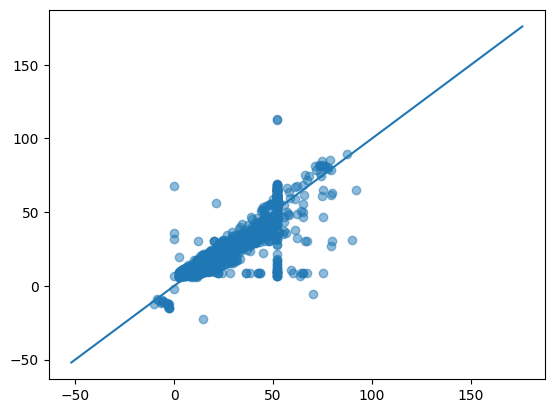

In [12]:
X= df.drop(['fare_amount','total_amount', 'tip_amount', 'payment_type', 'vendorid', 'ratecodeid', 'pulocationid', 'dolocationid', 'store_and_fwd_flag','tpep_pickup_datetime', 'tpep_dropoff_datetime' ], axis=1)
y=df['fare_amount']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.5,random_state=45)
linreg=linear_model.LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
r2=r2_score(y_test,y_pred)
print('r2_score is' ,r2)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error is ',mae)
intercept=linreg.intercept_
print('Intercept is ',intercept)
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()])



#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?


Decision Tree Regressor:
r2_score is 0.8652762777303785
Mean Squared Error is 24.790260587488735
Mean Absolute Error is 2.4196754750869474


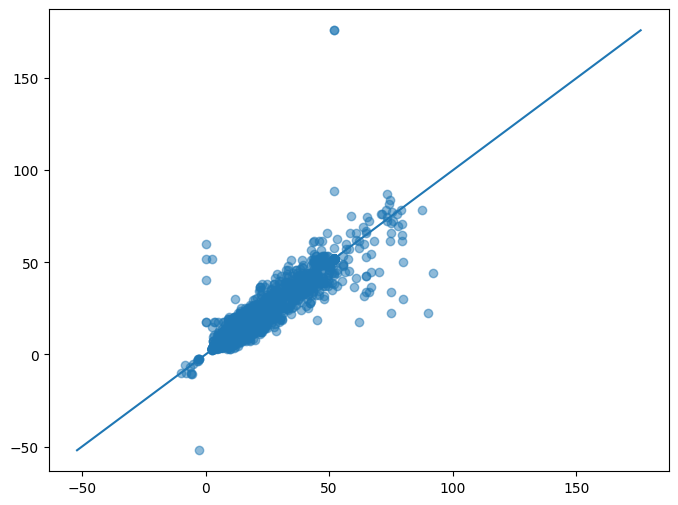

In [14]:
dtree = DecisionTreeRegressor(random_state=40)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print('Decision Tree Regressor:')
r2_dtree = r2_score(y_test, y_pred_dtree)
print('r2_score is', r2_dtree)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
print('Mean Squared Error is', mse_dtree)
mae_dtree = mean_absolute_error(y_test, y_pred_dtree)
print('Mean Absolute Error is', mae_dtree)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dtree, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.show()

#Decision tree regression model is better since this model has better r-square score than linear model and also mean squared error and mean absolute error is also less in case of decsion tree model. Hence we can say that decison tree model is more accurate than linear regression model.